# Witamy w Pipelines!

Biblioteka transformatorów HuggingFace udostępnia interfejsy API na dwóch różnych poziomach.

Wysoki poziom interfejsu API do używania modeli open source do typowych zadań wnioskowania nazywa się „pipelines”. Jest niezwykle łatwy w użyciu.

Tworzysz potok za pomocą czegoś takiego:

`my_pipeline = pipeline("the_task_I_want_to_do")`

Następnie

`result = my_pipeline(my_input)`

I to wszystko!

Zobacz koniec tego colab, aby uzyskać listę wszystkich potoków.

## Mała uwaga:

Możesz już to wiedzieć, ale na wszelki wypadek, gdybyś nie był zaznajomiony ze słowem „wnioskowanie”, którego używam tutaj:

Pracując z modelami Data Science, możesz wykonywać 2 bardzo różne czynności: **szkolenie** i **wnioskowanie**.

### 1. Szkolenie

**Szkolenie** to sytuacja, gdy dostarczasz modelowi dane, aby mógł się dostosować i lepiej wykonywać zadanie w przyszłości. Robi to poprzez aktualizację swoich wewnętrznych ustawień — parametrów lub wag modelu. Jeśli trenujesz model, który już przeszedł pewne szkolenie, czynność ta nazywa się „dostrajaniem”.

### 2. Wnioskowanie

**Wnioskowanie** to sytuacja, gdy pracujesz z modelem, który _został już wyszkolony_. Używasz tego modelu do generowania nowych wyników na podstawie nowych danych wejściowych, wykorzystując wszystko, czego nauczył się podczas szkolenia. Wnioskowanie jest czasami nazywane „wykonywaniem” lub „uruchamianiem modelu”.

Wszystkie nasze zastosowania interfejsów API dla GPT, Claude i Gemini w ostatnich tygodniach są przykładami **wnioskowania**. „P” w GPT oznacza „wstępnie wyszkolony”, co oznacza, że ​​został już wyszkolony przy użyciu danych (dużo danych!). W tygodniu 6 spróbujemy sami dostroić GPT.

Interfejs API potoków w HuggingFace jest przeznaczony wyłącznie do **wnioskowania** — uruchamiania modelu, który został już wyszkolony. W tygodniu 7 będziemy szkolić nasz własny model i będziemy musieli użyć bardziej zaawansowanych interfejsów API HuggingFace, które omówimy w nadchodzącym wykładzie.

In [2]:
# Instalacja niezbędnych bibliotek do pracy z modelami NLP i generatywnymi
!pip install -q transformers datasets diffusers

"""
Ogólny komentarz:
Powyższa komenda instaluje trzy kluczowe biblioteki:
1. `transformers` – biblioteka Hugging Face do pracy z modelami NLP, w tym modeli do generowania tekstu, tłumaczenia czy klasyfikacji.
2. `datasets` – biblioteka do łatwego pobierania, ładowania i przetwarzania zbiorów danych.
3. `diffusers` – biblioteka do generowania obrazów na bazie opisów tekstowych przy użyciu modeli dyfuzyjnych.

Cel użycia:
Kod ten jest przydatny dla osób pracujących z modelami językowymi (LLM) oraz modelami generatywnymi do przetwarzania tekstu, analizy danych czy generowania obrazów. Może być używany w projektach opartych na sztucznej inteligencji, takich jak chatboty, tłumaczenie języka, klasyfikacja tekstu czy generowanie treści wizualnych.
"""

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.4 MB/s eta 0:00:00


'\nOgólny komentarz:\nPowyższa komenda instaluje trzy kluczowe biblioteki:\n1. `transformers` – biblioteka Hugging Face do pracy z modelami NLP, w tym modeli do generowania tekstu, tłumaczenia czy klasyfikacji.\n2. `datasets` – biblioteka do łatwego pobierania, ładowania i przetwarzania zbiorów danych.\n3. `diffusers` – biblioteka do generowania obrazów na bazie opisów tekstowych przy użyciu modeli dyfuzyjnych.\n\nCel użycia:\nKod ten jest przydatny dla osób pracujących z modelami językowymi (LLM) oraz modelami generatywnymi do przetwarzania tekstu, analizy danych czy generowania obrazów. Może być używany w projektach opartych na sztucznej inteligencji, takich jak chatboty, tłumaczenie języka, klasyfikacja tekstu czy generowanie treści wizualnych.\n'

In [3]:
# Import niezbędnych bibliotek do pracy z modelami AI

import torch  # Biblioteka do obliczeń numerycznych na GPU i CPU, wykorzystywana w deep learningu.
from google.colab import userdata  # Moduł do obsługi danych użytkownika w Google Colab.
from huggingface_hub import login  # Funkcja do logowania się do Hugging Face Hub, wymagane do pobierania modeli.
from transformers import pipeline  # Wysokopoziomowa API do łatwego uruchamiania modeli NLP.
from diffusers import DiffusionPipeline  # Pipeline do generowania obrazów za pomocą modeli dyfuzyjnych.
from datasets import load_dataset  # Funkcja do pobierania i ładowania gotowych zbiorów danych.
import soundfile as sf  # Biblioteka do obsługi plików dźwiękowych, np. zapisywania wygenerowanego audio.
from IPython.display import Audio  # Moduł do odtwarzania plików audio bezpośrednio w notebooku Jupyter lub Google Colab.

"""
Ogólny komentarz:
Powyższe importy pozwalają na korzystanie z modeli AI do przetwarzania języka naturalnego, generowania obrazów
oraz syntezowania mowy. Dzięki nim możliwe jest łatwe uruchamianie gotowych modeli Hugging Face oraz pobieranie
zbiorów danych. Kod może być używany w projektach NLP, AI generatywnej oraz do pracy z multimodalnymi modelami AI.
"""

'\nOgólny komentarz:\nPowyższe importy pozwalają na korzystanie z modeli AI do przetwarzania języka naturalnego, generowania obrazów \noraz syntezowania mowy. Dzięki nim możliwe jest łatwe uruchamianie gotowych modeli Hugging Face oraz pobieranie \nzbiorów danych. Kod może być używany w projektach NLP, AI generatywnej oraz do pracy z multimodalnymi modelami AI.\n'

# Important Note

I didn't mention this in the lecture, but you may need to log in to the HuggingFace hub if you've not done so before.

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then Create a new API token, giving yourself write permissions.

**IMPORTANT** when you create your HuggingFace API key, please be sure to select read and write permissions for your key by clicking on the WRITE tab, otherwise you may get problems later.

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
  In the name field put `HF_TOKEN`  
  In the value field put your actual token: `hf_...`  
  Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab. There's also a shortcut to simply overwrite the line below with:  
`hf_token = "hf_...."`  
But this isn't a best practice, as you'd have to be careful not to share the colab. And one of the great things about colabs is that you can share them!

In [4]:
# Pobranie tokena autoryzacyjnego Hugging Face z danych użytkownika w Google Colab
hf_token = userdata.get('HF_TOKEN')

# Logowanie do Hugging Face Hub z wykorzystaniem tokena
# Parametr add_to_git_credential=True pozwala na zapisanie tokena w konfiguracji GIT,
# dzięki czemu można go ponownie użyć bez konieczności każdorazowego logowania.
login(hf_token, add_to_git_credential=True)

"""
Ogólny komentarz:
Kod ten służy do uwierzytelnienia użytkownika na platformie Hugging Face.
Dzięki temu możliwe jest pobieranie modeli i zasobów, które wymagają zalogowania,
np. modele dostępne tylko dla zalogowanych użytkowników lub własne, prywatne modele.
Jest to kluczowy krok, jeśli chcemy pracować z zasobami Hugging Face w Google Colab.
"""

'\nOgólny komentarz:\nKod ten służy do uwierzytelnienia użytkownika na platformie Hugging Face. \nDzięki temu możliwe jest pobieranie modeli i zasobów, które wymagają zalogowania, \nnp. modele dostępne tylko dla zalogowanych użytkowników lub własne, prywatne modele. \nJest to kluczowy krok, jeśli chcemy pracować z zasobami Hugging Face w Google Colab.\n'

In [5]:
# Tworzenie modelu do analizy sentymentu (pipeline z biblioteki transformers)
# "sentiment-analysis" - określa zadanie przetwarzania języka naturalnego (NLP), którym zajmuje się model
# device="cuda" - przyspiesza działanie modelu poprzez wykorzystanie GPU (jeśli dostępne)
classifier = pipeline("sentiment-analysis", device="cuda")

# Wykonanie analizy sentymentu na przykładowym zdaniu
# Model ocenia emocjonalny wydźwięk zdania (np. pozytywny, negatywny, neutralny)
result = classifier("I'm super excited to be on the way to LLM mastery!")

# Wyświetlenie wyniku analizy sentymentu
print(result)

"""
Ogólny komentarz:
Kod ten wykorzystuje model NLP do analizy sentymentu tekstu. Pipeline w transformers
pozwala na łatwe użycie modelu do klasyfikacji emocji w zdaniu. Model zwraca wynik w postaci
etykiety (np. "POSITIVE" lub "NEGATIVE") oraz poziomu pewności predykcji.
Można go użyć do analizy opinii klientów, recenzji produktów czy komentarzy w mediach społecznościowych.
"""

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


'\nOgólny komentarz:\nKod ten wykorzystuje model NLP do analizy sentymentu tekstu. Pipeline w transformers \npozwala na łatwe użycie modelu do klasyfikacji emocji w zdaniu. Model zwraca wynik w postaci \netykiety (np. "POSITIVE" lub "NEGATIVE") oraz poziomu pewności predykcji. \nMożna go użyć do analizy opinii klientów, recenzji produktów czy komentarzy w mediach społecznościowych.\n'

In [6]:
# Tworzenie modelu do rozpoznawania nazwanych encji (Named Entity Recognition - NER)
# "ner" - określa zadanie NLP polegające na identyfikacji i klasyfikacji encji w tekście
# grouped_entities=True - łączy rozpoznane jednostki, np. pełne imiona i nazwiska zamiast pojedynczych słów
# device="cuda" - wykorzystuje GPU do przyspieszenia obliczeń (jeśli dostępne)
ner = pipeline("ner", grouped_entities=True, device="cuda")

# Wykonanie analizy NER na przykładowym zdaniu
# Model identyfikuje w tekście nazwy własne, takie jak osoby, organizacje, lokalizacje, itp.
result = ner("Barack Obama was the 44th president of the United States.")

# Wyświetlenie wyniku analizy NER
print(result)

"""
Ogólny komentarz:
Kod ten wykorzystuje model NLP do wykrywania nazwanych encji w tekście. Model analizuje zdanie
i identyfikuje elementy, takie jak nazwy osób (np. "Barack Obama"), lokalizacje (np. "United States")
czy organizacje. Dzięki grouped_entities=True zwracane są pełne frazy zamiast pojedynczych słów.
Tego rodzaju analiza znajduje zastosowanie w ekstrakcji informacji z dokumentów, automatycznym
tagowaniu tekstu i systemach wyszukiwania kontekstowego.
"""

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': 0.99918306, 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': 0.9986908, 'word': 'United States', 'start': 43, 'end': 56}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


'\nOgólny komentarz:\nKod ten wykorzystuje model NLP do wykrywania nazwanych encji w tekście. Model analizuje zdanie \ni identyfikuje elementy, takie jak nazwy osób (np. "Barack Obama"), lokalizacje (np. "United States") \nczy organizacje. Dzięki grouped_entities=True zwracane są pełne frazy zamiast pojedynczych słów. \nTego rodzaju analiza znajduje zastosowanie w ekstrakcji informacji z dokumentów, automatycznym \ntagowaniu tekstu i systemach wyszukiwania kontekstowego.\n'

In [7]:
# Tworzenie modelu do zadawania pytań na podstawie kontekstu (Question Answering - QA)
# "question-answering" - określa zadanie NLP, w którym model odpowiada na pytania w oparciu o podany kontekst
# device="cuda" - używa GPU do przyspieszenia obliczeń (jeśli dostępne)
question_answerer = pipeline("question-answering", device="cuda")

# Przykładowe pytanie i kontekst
# Model analizuje kontekst i próbuje znaleźć odpowiedź na pytanie w podanym tekście
result = question_answerer(
    question="Who was the 44th president of the United States?",  # Pytanie do modelu
    context="Barack Obama was the 44th president of the United States."  # Kontekst, na podstawie którego model udzieli odpowiedzi
)

# Wyświetlenie wyniku
print(result)

"""
Ogólny komentarz:
Kod ten demonstruje wykorzystanie modelu NLP do odpowiadania na pytania na podstawie podanego kontekstu.
Model Hugging Face Transformers analizuje zdanie kontekstowe i próbuje wydobyć z niego odpowiedź na
zadane pytanie. W tym przypadku model poprawnie zwróci "Barack Obama" jako odpowiedź na pytanie.

Zastosowanie:
- Wyszukiwanie informacji w dużych zbiorach tekstowych
- Budowanie chatbotów i systemów wsparcia klienta
- Automatyczna ekstrakcja informacji z dokumentów i artykułów
"""

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda


{'score': 0.9889456033706665, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


'\nOgólny komentarz:\nKod ten demonstruje wykorzystanie modelu NLP do odpowiadania na pytania na podstawie podanego kontekstu.\nModel Hugging Face Transformers analizuje zdanie kontekstowe i próbuje wydobyć z niego odpowiedź na \nzadane pytanie. W tym przypadku model poprawnie zwróci "Barack Obama" jako odpowiedź na pytanie.\n\nZastosowanie:\n- Wyszukiwanie informacji w dużych zbiorach tekstowych\n- Budowanie chatbotów i systemów wsparcia klienta\n- Automatyczna ekstrakcja informacji z dokumentów i artykułów\n'

In [8]:
# Tworzenie modelu do podsumowywania tekstu (Summarization)
# "summarization" - określa zadanie NLP, w którym model generuje krótszą wersję podanego tekstu
# device="cuda" - używa GPU do przyspieszenia obliczeń (jeśli dostępne)
summarizer = pipeline("summarization", device="cuda")

# Tekst wejściowy do podsumowania
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""

# Wykonanie podsumowania tekstu
# max_length=50 - maksymalna liczba tokenów w podsumowaniu
# min_length=25 - minimalna liczba tokenów w podsumowaniu
# do_sample=False - wyłączenie losowego próbkowania, model generuje najbardziej prawdopodobne podsumowanie
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)

# Wyświetlenie wygenerowanego podsumowania
print(summary[0]['summary_text'])

"""
Ogólny komentarz:
Kod ten wykorzystuje model NLP do automatycznego podsumowywania dłuższego tekstu.
Model analizuje podany tekst i generuje skróconą wersję, zachowując kluczowe informacje.

Zastosowanie:
- Automatyczne podsumowywanie artykułów, raportów i dokumentów
- Generowanie streszczeń dla systemów rekomendacji treści
- Ułatwienie analizy długich tekstów poprzez wydobywanie najważniejszych informacji
"""

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


'\nOgólny komentarz:\nKod ten wykorzystuje model NLP do automatycznego podsumowywania dłuższego tekstu.\nModel analizuje podany tekst i generuje skróconą wersję, zachowując kluczowe informacje.\n\nZastosowanie:\n- Automatyczne podsumowywanie artykułów, raportów i dokumentów\n- Generowanie streszczeń dla systemów rekomendacji treści\n- Ułatwienie analizy długich tekstów poprzez wydobywanie najważniejszych informacji\n'

In [9]:
# Importowanie niezbędnych bibliotek nie jest tu pokazane, ale musisz mieć zainstalowane biblioteki transformers i torch.
# Użyj pip install transformers i pip install torch, aby je zainstalować.

# Ustawienie translatora za pomocą pipeline z modelem "translation_en_to_fr", który tłumaczy z angielskiego na francuski.
# Parametr device="cuda" oznacza, że jeśli masz kartę graficzną NVIDIA, kod będzie wykonywany na niej, co przyspiesza obliczenia.
translator = pipeline("translation_en_to_fr", device="cuda")

# Użycie translatora do tłumaczenia podanego tekstu.
# Wynik jest przechowywany w zmiennej result.
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")

# Wypisanie tłumaczenia. Wynik jest listą słowników, dlatego używamy [0]['translation_text'].
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [10]:
# Another translation, showing a model being specified
# All translation models are here: https://huggingface.co/models?pipeline_tag=translation&sort=trending

translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es", device="cuda")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda


Los científicos de datos estaban verdaderamente sorprendidos por el poder y la simplicidad de la API de tuberías HuggingFace.


In [11]:
# Importowanie niezbędnych bibliotek nie jest tu pokazane, ale musisz mieć zainstalowane biblioteki transformers.
# Użyj pip install transformers, aby je zainstalować.

# Ustawienie klasyfikatora za pomocą pipeline z modelem "zero-shot-classification", który pozwala klasyfikować tekst bez wcześniejszego treningu na danych z konkretnymi etykietami.
# Parametr device="cuda" oznacza, że jeśli masz kartę graficzną NVIDIA, kod będzie wykonywany na niej, co przyspiesza obliczenia.
classifier = pipeline("zero-shot-classification", device="cuda")

# Użycie klasyfikatora do klasyfikacji podanego tekstu z kandydatami na etykiety.
# Wynik jest przechowywany w zmiennej result.
result = classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])

# Wypisanie wyniku klasyfikacji. Wynik zawiera etykietę z największym prawdopodobieństwem.
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839740753174, 0.03225007280707359, 0.018365919589996338]}


In [12]:
# Importowanie niezbędnych bibliotek nie jest tu pokazane, ale musisz mieć zainstalowane biblioteki transformers.
# Użyj pip install transformers, aby je zainstalować.

# Ustawienie generatora tekstu za pomocą pipeline z modelem "text-generation", który generuje tekst na podstawie podanego tekstu.
# Parametr device="cuda" oznacza, że jeśli masz kartę graficzną NVIDIA, kod będzie wykonywany na niej, co przyspiesza obliczenia.
generator = pipeline("text-generation", device="cuda")

# Użycie generatora do wygenerowania tekstu na podstawie podanego fragmentu.
# Wynik jest przechowywany w zmiennej result.
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")

# Wypisanie wygenerowanego tekstu. Wynik jest listą słowników, dlatego używamy [0]['generated_text'].
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that you don't need a whole lot of resources. In fact, this means that you will be able to use them up to your heart's content within


In [ ]:
# Image Generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"
image = image_gen(prompt=text).images[0]
image

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

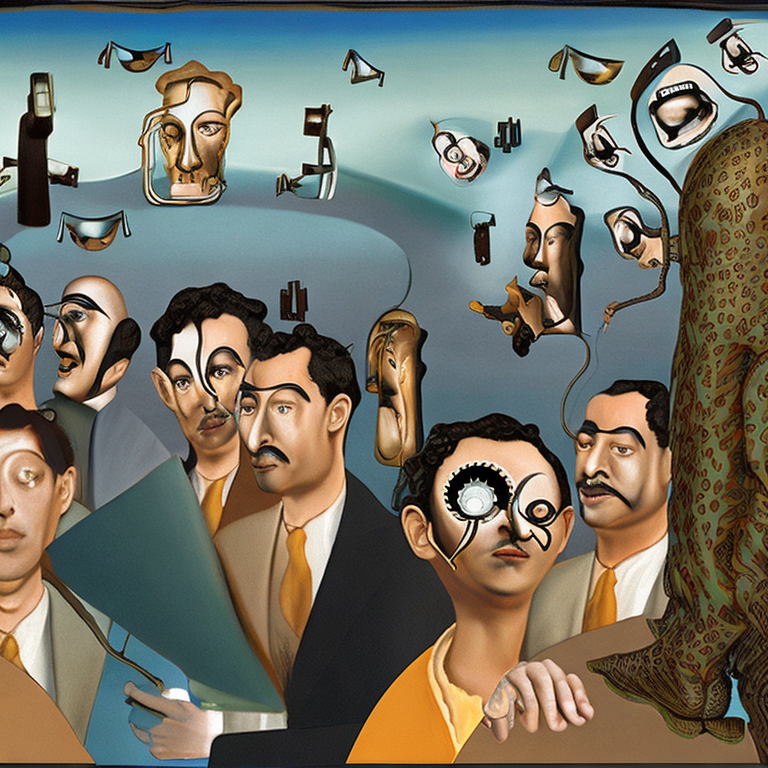

In [13]:
# Importowanie niezbędnych bibliotek nie jest tu pokazane, ale musisz mieć zainstalowane biblioteki diffusers i torch.
# Użyj pip install diffusers torch, aby je zainstalować.

# Ustawienie generatora obrazów za pomocą DiffusionPipeline z modelem "stabilityai/stable-diffusion-2".
# Parametry: torch_dtype=torch.float16 i use_safetensors=True są używane do optymalizacji pamięci i bezpieczeństwa.
# Variant="fp16" również pomaga w optymalizacji pamięci.
# Metoda to("cuda") przenosi model na kartę graficzną, jeśli jest dostępna, co przyspiesza obliczenia.
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
).to("cuda")

# Definicja tekstu, który posłuży jako podstawa do wygenerowania obrazu.
text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"

# Użycie generatora do wygenerowania obrazu na podstawie podanego tekstu.
# Wynik jest przechowywany w zmiennej image.
# Metoda images[0] zwraca pierwszy wygenerowany obraz.
image = image_gen(prompt=text).images[0]

# Wyświetlenie wygenerowanego obrazu.
# W tym przypadku obraz jest obiektem PIL Image i może być wyświetlony bezpośrednio.
image

In [ ]:
!pip install pydub

# Wszystkie dostępne potoki

Oto wszystkie potoki dostępne w Transformers i Diffusers.

Dzięki studentowi Lucky P za sugestię, abym to uwzględnił!

Na tej stronie znajduje się lista potoków pod zadaniami (musisz przewinąć trochę w dół, a następnie rozwinąć parametry, aby zobaczyć zadania):

https://huggingface.co/docs/transformers/main_classes/pipelines

Jest też ta lista zadań dla modeli Diffusion zamiast Transformers, zgodnie z przykładem generowania obrazu, w którym używam DiffusionPipeline powyżej.

https://huggingface.co/docs/diffusers/en/api/pipelines/overview

Jeśli wpadniesz na jakieś fajne przykłady innych potoków, podziel się nimi ze mną! To wspaniałe, jak HuggingFace udostępnia tę zaawansowaną funkcjonalność AI do wnioskowania za pomocą tak prostego API.